# Beispiel 2.2: Lotto 6 aus 45

# Lottorechner aus 2.1 als Basis hernehmen und die Daten visualisieren

In [16]:
import random

def userZahlen():

    userList = []
    count = 1

    # V1 Zahlen einzeln einlesen
    
    while len(set(userList)) != 6:          #solange wir nicht 6 eindeutige Zahlen in userList haben, läuft die Schleife
        raw = input(f'Zahl{count}: ')        # str -> check ob .numeric

        #check ob raw eine zahl ist
        if raw.isdigit():
            zahl = int(raw)

            #check ob zahl innerhalb 1-45 ist
            #if zahl >= 1 and zahl <=45:
            if zahl >= 1 and zahl <= 45:
                
                if zahl not in userList:
                    userList.append(zahl)
                    count += 1

                else:
                    print('Zahl bereits in Liste!')
                    continue

            else:
                print('Zahl ist außerhalb des Bereiches 1-45!')
                continue
        else:
            print('Es wurde keine natürliche Zahl eingegeben!')
            continue #-> wieder an schleifen beginn springen

    return set(userList)


In [17]:
def Ziehung():

    while True:
        raw = input("Anzahl der Ziehungen (min. 10): ")
        
        if raw.isdigit():
            zahl = int(raw)
            
            if zahl >= 10:
                return zahl
            
            else:
                print('Zahl ist kleiner als 10!')
                continue
            
        else:
            print('Es wurde keine natürliche Zahl eingegeben!')
            continue
            

In [18]:
def computerZahlen(ziehungen):

    #Liste zum Speichern aller Ziehungen
    computer_list = []
    
    #für die Anzahl der ziehungen jeweils 6 zufällige Zahlen generieren
    
    for i in range(ziehungen):
        computer_list.append(random.sample(population=range(1,46), k=6))
        #gibt immer 6 zufällige Zahlen zwischen 1-45 zurück
    
    return computer_list

In [19]:
def compare(cpuZahlen, meineZahlen):

    übereinstimmungen_lang = []
    übereinstimmungen_kurz ={}
    
    for i in cpuZahlen:
        übereinstimmungen_lang.append(len(set(i).intersection(meineZahlen)))

    for gewinner in range(7):
        #zählen wie oft jede zahl in der Liste vorkommt
        übereinstimmungen_kurz[gewinner] = übereinstimmungen_lang.count(gewinner)
        
    
    #Gemeinsamkeiten zwischen den beiden Zahlenlisten
    return übereinstimmungen_kurz

#compare(computerZahlen(Ziehung()), userZahlen())

In [20]:
draw_count = Ziehung()
cpuZahlen = computerZahlen(draw_count)
meineZahlen = userZahlen()
Ergebnisse = compare(cpuZahlen, meineZahlen)

print(f'Unsere Zahlen: {meineZahlen}')
print(f"Anzahl der Ziehungen: {draw_count}")

for lotto in Ergebnisse:
    print(f'{lotto}er Lotto: {Ergebnisse[lotto]}')
    

Unsere Zahlen: {1, 2, 3, 4, 5, 6}
Anzahl der Ziehungen: 1000
0er Lotto: 402
1er Lotto: 427
2er Lotto: 150
3er Lotto: 20
4er Lotto: 1
5er Lotto: 0
6er Lotto: 0


# Visualisierung der Ergebnisse

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


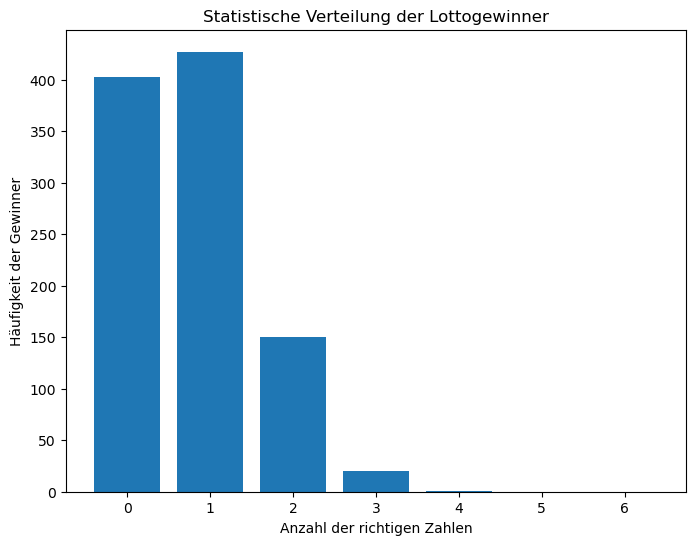

In [22]:

# Daten aus Ergebnisse in DataFrame umwandeln
df = pd.DataFrame(Ergebnisse.items(), columns=['Übereinstimmungen', 'Anzahl'])

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
plt.bar(df['Übereinstimmungen'], df['Anzahl'])

# Adding labels and title
plt.title('Statistische Verteilung der Lottogewinner')
plt.xlabel('Anzahl der richtigen Zahlen')
plt.ylabel('Häufigkeit der Gewinner')

# Show the plot
plt.show()